### Installs and Imports

In [2]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Download latest version
path = kagglehub.dataset_download("benroshan/factors-affecting-campus-placement")

print("Path to dataset files:", path)

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.51k/4.51k [00:00<00:00, 1.58MB/s]

Extracting files...
Path to dataset files: C:\Users\masha\.cache\kagglehub\datasets\benroshan\factors-affecting-campus-placement\versions\1


In [4]:
dataset_folder = r"C:\Users\masha\.cache\kagglehub\datasets\benroshan\factors-affecting-campus-placement\versions\1"

# List all files in the folder
csv_files = [f for f in os.listdir(dataset_folder) if f.endswith(".csv")]

# Ensure there's at least one CSV file
if len(csv_files) == 1:
    dataset_path = os.path.join(dataset_folder, csv_files[0])  # Select the first CSV file
    df = pd.read_csv(dataset_path)
    print("Dataset Loaded!")
    
    # Display dataset info
    print(df.info())
    print(df.head())  # Show first few rows
else:
    print("No CSV file found")

Dataset Loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_

In [5]:
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b             

### Data Preprocessing

In [ ]:
# Handle missing values in the 'salary' column (for non-placed students)
df.loc[:, 'salary'] = df['salary'].fillna(0)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop unnecessary columns
# Drop 'sl_no' only if it exists
if 'sl_no' in df.columns:
    df.drop(['sl_no'], axis=1, inplace=True)

# Display the preprocessed dataset
print(df.head())

   gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1  67.00      1  91.00      1      1     58.00         2       0   
1       1  79.33      0  78.33      1      2     77.48         2       1   
2       1  65.00      0  68.00      0      0     64.00         0       0   
3       1  56.00      0  52.00      0      2     52.00         2       0   
4       1  85.80      0  73.60      0      1     73.30         0       0   

   etest_p  specialisation  mba_p  status    salary  
0     55.0               1  58.80       1  270000.0  
1     86.5               0  66.28       1  200000.0  
2     75.0               0  57.80       1  250000.0  
3     66.0               1  59.43       0       0.0  
4     96.8               0  55.50       1  425000.0  


In [7]:
# Summary statistics for placed vs. non-placed students
placed = df[df['status'] == 1]
not_placed = df[df['status'] == 0]

print("Placed Students Summary:")
print(placed.describe())

print("\nNot Placed Students Summary:")
print(not_placed.describe())

Placed Students Summary:
           gender       ssc_p       ssc_b       hsc_p       hsc_b       hsc_s  \
count  148.000000  148.000000  148.000000  148.000000  148.000000  148.000000   
mean     0.675676   71.721486    0.472973   69.926554    0.614865    1.385135   
std      0.469711    8.715445    0.500964    9.329268    0.488280    0.565729   
min      0.000000   49.000000    0.000000   50.830000    0.000000    0.000000   
25%      0.000000   65.000000    0.000000   63.000000    0.000000    1.000000   
50%      1.000000   72.500000    0.000000   68.000000    1.000000    1.000000   
75%      1.000000   78.125000    1.000000   75.250000    1.000000    2.000000   
max      1.000000   89.400000    1.000000   97.700000    1.000000    2.000000   

         degree_p    degree_t      workex     etest_p  specialisation  \
count  148.000000  148.000000  148.000000  148.000000      148.000000   
mean    68.740541    0.587838    0.432432   73.238041        0.358108   
std      6.518087    0.895

### Data Visualization

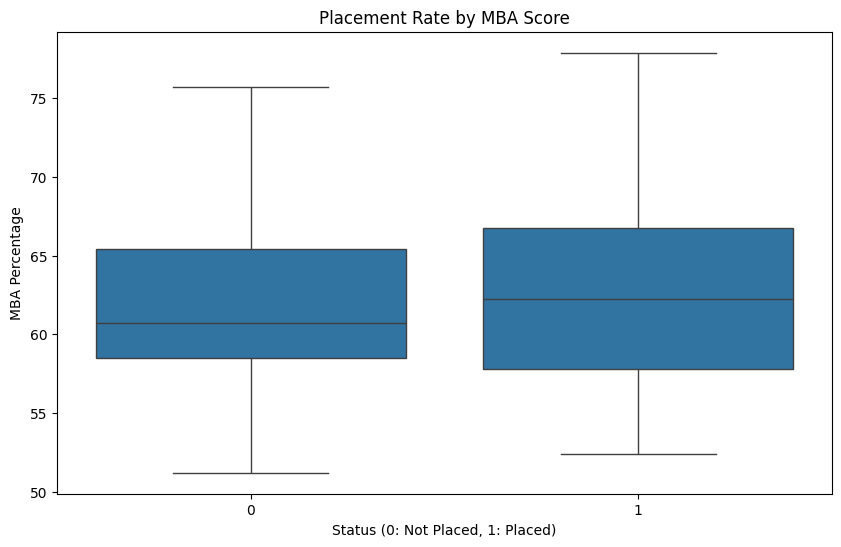

In [8]:
# Placement Rate by MBA Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='mba_p', data=df)
plt.title('Placement Rate by MBA Score')
plt.xlabel('Status (0: Not Placed, 1: Placed)')
plt.ylabel('MBA Percentage')
plt.show()

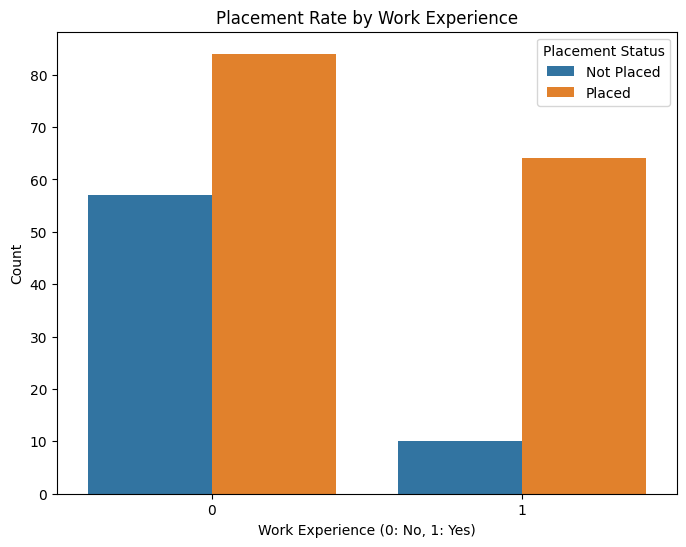

In [9]:
# Placement Rate by Work Experience
plt.figure(figsize=(8, 6))
sns.countplot(x='workex', hue='status', data=df)
plt.title('Placement Rate by Work Experience')
plt.legend(title="Placement Status", labels=['Not Placed', 'Placed'])
plt.xlabel('Work Experience (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

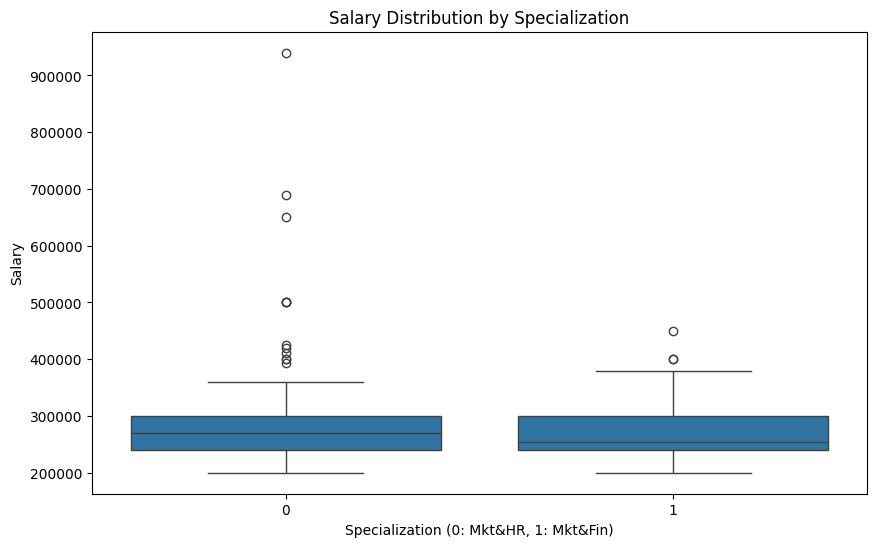

In [10]:
# Salary Distribution by Specialization
plt.figure(figsize=(10, 6))
sns.boxplot(x='specialisation', y='salary', data=df[df['salary'] > 0])
plt.title('Salary Distribution by Specialization')
plt.xlabel('Specialization (0: Mkt&HR, 1: Mkt&Fin)')
plt.ylabel('Salary')
plt.show()

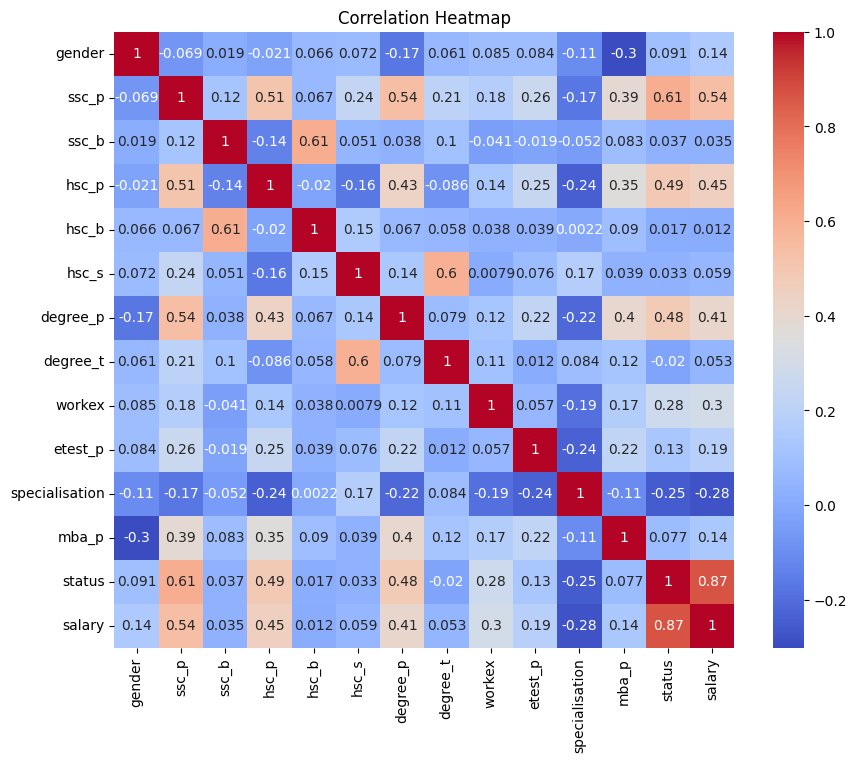

<Figure size 640x480 with 0 Axes>

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('correlation_heatmap.png')

### Statistical Analysis

In [12]:
# Define features and target
X = df.drop(['status', 'salary'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase iterations
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print(coefficients)

Logistic Regression Accuracy: 0.88
           Feature  Coefficient
0           gender     1.036689
1            ssc_p     0.230457
2            ssc_b     0.240673
3            hsc_p     0.112004
4            hsc_b    -0.032341
5            hsc_s    -0.219077
6         degree_p     0.195342
7         degree_t    -0.380652
8           workex     1.236120
9          etest_p    -0.015562
10  specialisation    -0.309728
11           mba_p    -0.200064


In [13]:
#Salary Prediction
# Filter data for placed students only
placed_df = df[df['status'] == 1]

# Define features and target
X_salary = placed_df.drop(['status', 'salary'], axis=1)
y_salary = placed_df['salary']

# Split the data into training and testing sets
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_salary, y_train_salary)

# Predict on the test set
y_pred_salary = lin_reg.predict(X_test_salary)

# Evaluate the model
mse = mean_squared_error(y_test_salary, y_pred_salary)
r2 = r2_score(y_test_salary, y_pred_salary)
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2 Score: {r2:.2f}")

# Display coefficients
coefficients_salary = pd.DataFrame({'Feature': X_salary.columns, 'Coefficient': lin_reg.coef_})
print(coefficients_salary)

Linear Regression MSE: 9965027446.46
Linear Regression R2 Score: -0.18
           Feature   Coefficient
0           gender  35058.997012
1            ssc_p  -1434.640261
2            ssc_b  23342.890913
3            hsc_p   -361.938725
4            hsc_b -28020.877235
5            hsc_s   9932.705907
6         degree_p  -2558.556676
7         degree_t  10229.681486
8           workex  10235.747119
9          etest_p    299.663725
10  specialisation -23206.393178
11           mba_p   4504.011609


In [16]:
# Save the preprocessed dataset
df.to_csv('preprocessed_placement_data.csv', index=False)